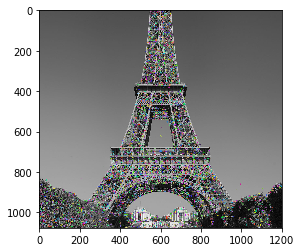

In [2]:
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

#reading image
img1 = cv2.imread('eifel.jpg')  
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

#keypoints
sift = cv2.xfeatures2d.SIFT_create()
keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)

img_1 = cv2.drawKeypoints(gray1,keypoints_1,img1)
plt.imshow(img_1)

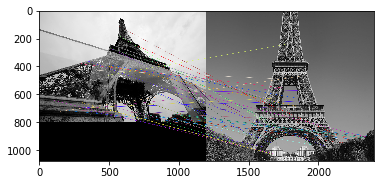

True

In [13]:
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

# read images
img1 = cv2.imread('eifel2.jpg')  
img2 = cv2.imread('eifel.jpg') 

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

#sift
sift = cv2.xfeatures2d.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)
plt.imshow(img3),plt.show()
cv2.imwrite("result1.jpg", img3)


In [3]:
import glfw
from OpenGL.GL import *
import OpenGL.GL.shaders
import numpy


def main():

    # initialize glfw
    if not glfw.init():
        return

    window = glfw.create_window(800, 600, "My OpenGL window", None, None)

    if not window:
        glfw.terminate()
        return

    glfw.make_context_current(window)
    #            positions        colors
    triangle = [-0.5, -0.5, 0.0, 1.0, 0.0, 0.0,
                 0.5, -0.5, 0.0, 0.0, 1.0, 0.0,
                 0.0,  0.5, 0.0, 0.0, 0.0, 1.0]

    triangle = numpy.array(triangle, dtype = numpy.float32)

    vertex_shader = """
    #version 330
    in vec3 position;
    in vec3 color;
    out vec3 newColor;
    void main()
    {
        gl_Position = vec4(position, 1.0f);
        newColor = color;
    }
    """

    fragment_shader = """
    #version 330
    in vec3 newColor;
    out vec4 outColor;
    void main()
    {
        outColor = vec4(newColor, 1.0f);
    }
    """
    shader = OpenGL.GL.shaders.compileProgram(OpenGL.GL.shaders.compileShader(vertex_shader, GL_VERTEX_SHADER),
                                              OpenGL.GL.shaders.compileShader(fragment_shader, GL_FRAGMENT_SHADER))

    VBO = glGenBuffers(1)
    glBindBuffer(GL_ARRAY_BUFFER, VBO)
    glBufferData(GL_ARRAY_BUFFER, 72, triangle, GL_STATIC_DRAW)

    position = glGetAttribLocation(shader, "position")
    glVertexAttribPointer(position, 3, GL_FLOAT, GL_FALSE, 24, ctypes.c_void_p(0))
    glEnableVertexAttribArray(position)

    color = glGetAttribLocation(shader, "color")
    glVertexAttribPointer(color, 3, GL_FLOAT, GL_FALSE, 24, ctypes.c_void_p(12))
    glEnableVertexAttribArray(color)


    glUseProgram(shader)

    glClearColor(0.2, 0.3, 0.2, 1.0)

    while not glfw.window_should_close(window):
        glfw.poll_events()

        glClear(GL_COLOR_BUFFER_BIT)

        glDrawArrays(GL_TRIANGLES, 0, 3)

        glfw.swap_buffers(window)

    glfw.terminate()

if __name__ == "__main__":
    main()

In [2]:
import glfw

def main():
    # Initialize the library
    if not glfw.init():
        return
    # Create a windowed mode window and its OpenGL context
    window = glfw.create_window(640, 480, "Hello World", None, None)
    if not window:
        glfw.terminate()
        return

    # Make the window's context current
    glfw.make_context_current(window)

    # Loop until the user closes the window
    while not glfw.window_should_close(window):
        # Render here, e.g. using pyOpenGL

        # Swap front and back buffers
        glfw.swap_buffers(window)

        # Poll for and process events
        glfw.poll_events()

    glfw.terminate()

if __name__ == "__main__":
    main()

128
<KeyPoint 000001D197DF0C30>


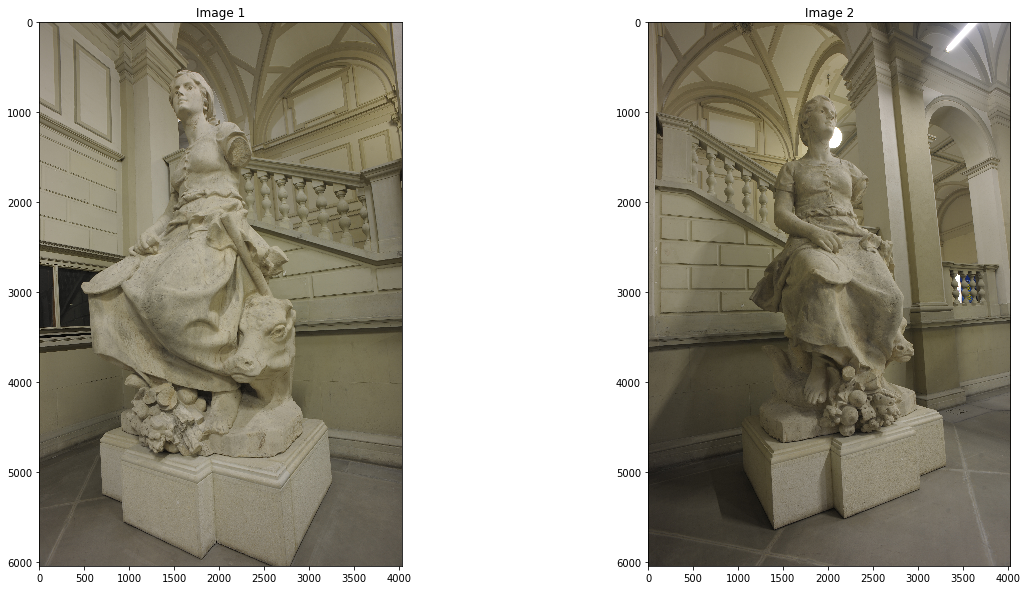

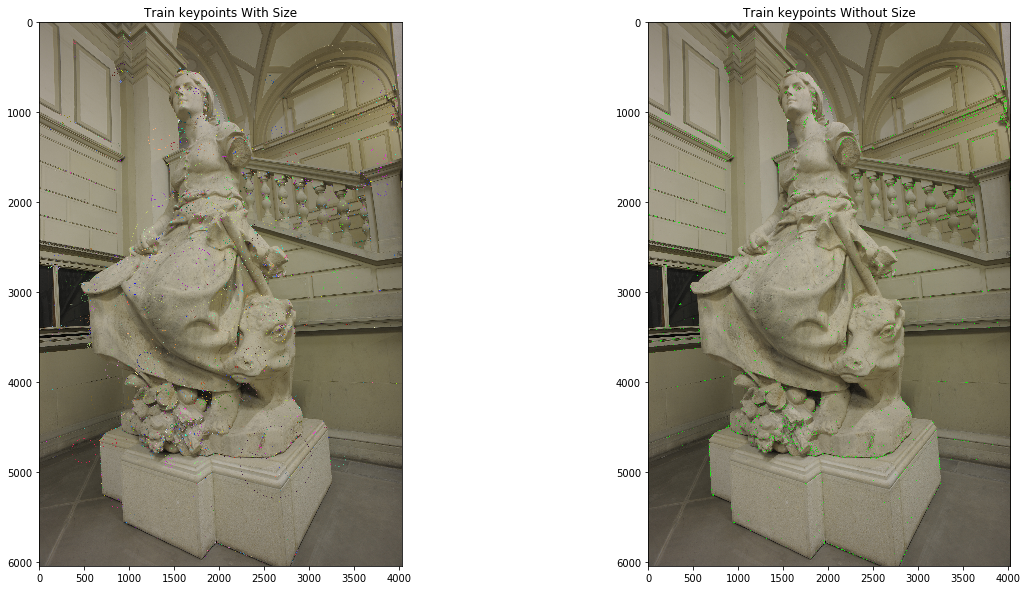

Number Keypoints image1  5925
Number Keypoints image2  6071


In [8]:
import cv2
import matplotlib.pyplot as plt 
import numpy as np

image1 = cv2.imread('statue0.jpg')
image = cv2.imread('statue1.jpg')


training_image = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
training_gray = cv2.cvtColor(training_image, cv2.COLOR_RGB2GRAY)
test_gray = cv2.cvtColor(image2, cv2.COLOR_RGB2GRAY)

fx, plots = plt.subplots(1, 2, figsize=(20,10))
plots[0].set_title("Image 1")
plots[0].imshow(training_image)
plots[1].set_title("Image 2")
plots[1].imshow(image2)

sift = cv2.xfeatures2d.SIFT_create()
train_keypoints, train_descriptor = sift.detectAndCompute(training_gray, None)
print(len(train_descriptor[3])) # print the feature vector
test_keypoints, test_descriptor = sift.detectAndCompute(test_gray, None)
print(test_keypoints[3]) 

keypoints_without_size = np.copy(training_image)
keypoints_with_size = np.copy(training_image)

cv2.drawKeypoints(training_image, train_keypoints, keypoints_without_size, color = (0, 255, 0))
cv2.drawKeypoints(training_image, train_keypoints, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Train keypoints With Size")
plots[0].imshow(keypoints_with_size, cmap='gray')

plots[1].set_title("Train keypoints Without Size")
plots[1].imshow(keypoints_without_size, cmap='gray')

cv2.imwrite('keypoints_with_size.jpg',keypoints_with_size)
cv2.imwrite('keypoints_without_size.jpg',keypoints_without_size)
plt.show()
print("Number Keypoints image1 ", len(train_keypoints))
print("Number Keypoints image2 ", len(test_keypoints))